In [33]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import math

from scipy import linalg as al
from scipy import stats as est
from collections import deque 


#cociente de Rayleigh para matriz A y vector v dados

def rayleigh(A,v):
    numerador = sp.dot(sp.dot(A,v),v)
    denominador = sp.dot(v,v)
    S = numerador/denominador
    return S

def eigenvalores(A):
        av=list(al.eigh(A))
    
        av[0]=av[0].astype(float)
        av[1]=av[1].astype(float)
    
        for i in range(len(av[0]-1)):
            av[0][i]=round(float(av[0][i]),5)
    
        return av[0]
    
def eigenvectores(A):
        av=list(al.eigh(A))
    
        av[1]=av[1].astype(float)
    
        for i in range(len(av[1]-1)):
            for j in range(len(av[1][i]-1)):
                av[1][i][j]=round(float(av[1][i][j]),3)
    
        return av[1].T
    
def Fiedler(G):
        lap=nx.laplacian_matrix(G)
        print("valor Fiedler")
        print(eigenvalores(lap.A)[1])
        print("vector Fiedler")
        print(eigenvectores(lap.A)[1])
        print("los eigenvalores")
        print(eigenvalores(lap.A))
        
        
def weighted_path(n,pesos):
    G = nx.path_graph(n)
    for i in range(min(n-1,len(pesos))):
        G[i][i+1]['weight']=pesos[i]
    return(G)


def hm_extrem(G):
    d=est.hmean([G[0][1]['weight'],G[len(list(G.nodes))-2][len(list(G.nodes))-1]['weight']])
    G[0][1]['weight']=d
    G[len(list(G.nodes))-2][len(list(G.nodes))-1]['weight']=d
    return(G)

def K_index(G):    #El indice de Kirchoff de la grafica con pesos G
    L=nx.laplacian_matrix(G)
    return(sum(1/np.delete(eigenvalores(L.A),0)))





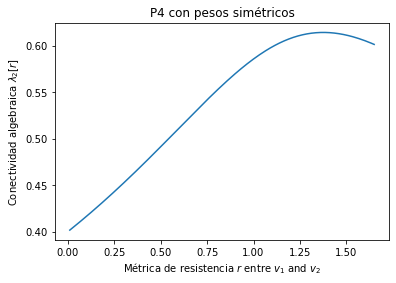

In [2]:
#P4 simetrico, su conectividad algebraica

r = np.linspace(0.01,1.65, 200)
lambda2 = (1/(r*(5-3*r)))*(5-r-np.sqrt(13*r**2-30*r+25))

fig, ax = plt.subplots()

ax.plot(r, lambda2)

ax.set_xlabel("Métrica de resistencia $r$ entre $v_1$ and $v_2$")
ax.set_ylabel("Conectividad algebraica $\lambda_2[r]$")

plt.title("P4 con pesos simétricos")

plt.show()


plt.show()

[(0, 1), (1, 2), (2, 3)]


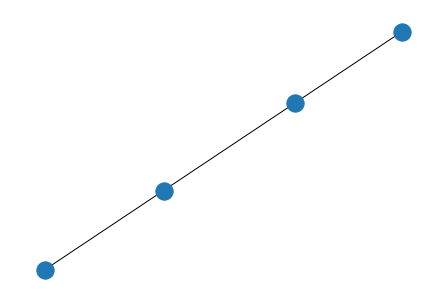

In [3]:

G=nx.path_graph(4)
print(G.edges())

G[0][1]['weight']=2
G[1][2]['weight']=1.5
G[2][3]['weight']=1.5


nx.draw(G)

[(0, 1, {'weight': 2}), (1, 2, {'weight': 4}), (2, 3, {'weight': 8.33})]


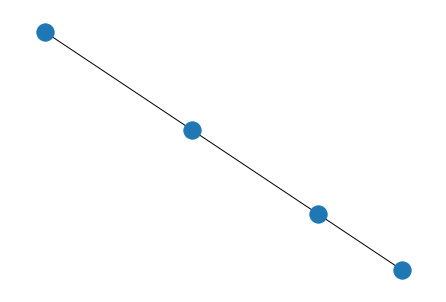

In [5]:
G=weighted_path(4,[2,4,8.33])

print(G.edges.data())

nx.draw(G)

In [16]:
L=nx.laplacian_matrix(G)
print(L.A)
print(eigenvalores(L.A))
print(1/np.delete(eigenvalores(L.A),0))
sum(1/np.delete(eigenvalores(L.A),0))

[[ 2.   -2.    0.    0.  ]
 [-2.    6.   -4.    0.  ]
 [ 0.   -4.   12.33 -8.33]
 [ 0.    0.   -8.33  8.33]]
[ 0.       1.91109  7.09786 19.65105]
[0.52326159 0.14088754 0.05088787]


0.7150369953277723

In [68]:
est.hmean([1,400])

1.9950124688279303

In [9]:
G=weighted_path(4,[3,4,3])
print("Grafica original")
Fiedler(G)
G1=promediar_arm_extremos(G)
print("Grafica simetrizada")
Fiedler(G1)

Grafica original
valor Fiedler
2.0
vector Fiedler
[-0.671 -0.224  0.224  0.671]
los eigenvalores
[ 0.  2.  6. 12.]
Grafica simetrizada
valor Fiedler
2.0
vector Fiedler
[-0.671 -0.224  0.224  0.671]
los eigenvalores
[ 0.  2.  6. 12.]


In [152]:
r1 = np.linspace(0.1,1.9, 20)
r2 = 1
r3 = []
for i in range(len(r1)):
    r3 = r3 + [(10-4*r2-3*r1[i])/3]
       

fiedler_original=[]
fiedler_simetrizado=[]

for i in range(len(r1)):
    resistencias = [r1[i],r2,r3[i]]
    
    conducs = []
    conducs_simi = []
    
    for j in range(len(resistencias)):
        conducs = conducs + [1/resistencias[j]]
    
    d = 2/((1/conducs[0])+(1/conducs[2]))    
    conducs_simi = [d,conducs[1],d]
    
    print(["res",resistencias[0],resistencias[2]])
    print(["ces",conducs[0],conducs[2]])
    print(["cesims",conducs_simi[0],conducs_simi[2]])
                    
    G = weighted_path(4,conducs)
    lap=nx.laplacian_matrix(G)
    fiedler_original = fiedler_original  + [eigenvalores(lap.A)[1]]
    
    G1 = weighted_path(4,conducs_simi)
    lap=nx.laplacian_matrix(G1)
    fiedler_simetrizado = fiedler_simetrizado  + [eigenvalores(lap.A)[1]]
    




['res', 0.1, 1.9000000000000001]
['resims', 1.0, 1.0]
['ces', 10.0, 0.5263157894736842]
['cesims', 1.0, 1.0]
['res', 0.19473684210526315, 1.8052631578947367]
['resims', 0.9999999999999999, 0.9999999999999999]
['ces', 5.135135135135135, 0.5539358600583091]
['cesims', 1.0000000000000002, 1.0000000000000002]
['res', 0.2894736842105263, 1.7105263157894737]
['resims', 1.0, 1.0]
['ces', 3.4545454545454546, 0.5846153846153846]
['cesims', 1.0, 1.0]
['res', 0.38421052631578945, 1.6157894736842107]
['resims', 1.0, 1.0]
['ces', 2.6027397260273974, 0.6188925081433224]
['cesims', 1.0, 1.0]
['res', 0.47894736842105257, 1.5210526315789474]
['resims', 1.0, 1.0]
['ces', 2.087912087912088, 0.657439446366782]
['cesims', 1.0, 1.0]
['res', 0.5736842105263157, 1.4263157894736842]
['resims', 1.0, 1.0]
['ces', 1.743119266055046, 0.7011070110701108]
['cesims', 1.0, 1.0]
['res', 0.6684210526315789, 1.3315789473684212]
['resims', 1.0, 1.0]
['ces', 1.4960629921259843, 0.75098814229249]
['cesims', 1.0, 1.0]
['res'

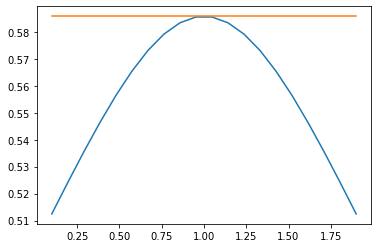

In [122]:

plt.plot(r1,fiedler_original)
plt.plot(r1,fiedler_simetrizado)


plt.show()

In [100]:
r1 = np.linspace(0.1,1.9, 20)
r2 = 1
r3 = []
for i in range(len(r1)):
    r = 3*r1[i]
    r3 = r3 + [(10-4-r)/3]
    print([r1[i],r3[i]])

[0.1, 1.9000000000000001]
[0.19473684210526315, 1.8052631578947367]
[0.2894736842105263, 1.7105263157894737]
[0.38421052631578945, 1.6157894736842107]
[0.47894736842105257, 1.5210526315789474]
[0.5736842105263157, 1.4263157894736842]
[0.6684210526315789, 1.3315789473684212]
[0.763157894736842, 1.236842105263158]
[0.8578947368421052, 1.1421052631578947]
[0.9526315789473683, 1.0473684210526317]
[1.0473684210526315, 0.9526315789473685]
[1.1421052631578947, 0.8578947368421052]
[1.236842105263158, 0.763157894736842]
[1.331578947368421, 0.668421052631579]
[1.4263157894736842, 0.5736842105263159]
[1.5210526315789472, 0.47894736842105284]
[1.6157894736842104, 0.38421052631578956]
[1.7105263157894737, 0.28947368421052627]
[1.8052631578947367, 0.19473684210526324]
[1.9, 0.10000000000000024]


In [113]:
G = weighted_path(4,[r1[4],r2,r3[4]])
G.edges.data()

EdgeDataView([(0, 1, {'weight': 0.47894736842105257}), (1, 2, {'weight': 1}), (2, 3, {'weight': 1.5210526315789474})])

In [143]:
r1 = np.linspace(0.1,1.9, 20)
r2 = 1
r3 = []
for i in range(len(r1)):
    r3 = r3 + [(10-4*r2-3*r1[i])/3]

In [26]:
for i in range(32):              #indices de Kirchoff de graficas completas
    print(i+1,round(K_index(nx.complete_graph(i+1)),2))

1 0
2 0.5
3 0.67
4 0.75
5 0.8
6 0.83
7 0.86
8 0.88
9 0.89
10 0.9
11 0.91
12 0.92
13 0.92
14 0.93
15 0.93
16 0.94
17 0.94
18 0.94
19 0.95
20 0.95
21 0.95
22 0.95
23 0.96
24 0.96
25 0.96
26 0.96
27 0.96
28 0.96
29 0.97
30 0.97
31 0.97
32 0.97


In [27]:
for i in range(32):              #indices de Kirchoff de caminos
    print(i+1,round(K_index(nx.path_graph(i+1)),2))

1 0
2 0.5
3 1.33
4 2.5
5 4.0
6 5.83
7 8.0
8 10.5
9 13.33
10 16.5
11 20.0
12 23.83
13 28.0
14 32.5
15 37.34
16 42.5
17 48.0
18 53.84
19 60.0
20 66.51
21 73.33
22 80.49
23 87.99
24 95.83
25 104.0
26 112.51
27 121.35
28 130.47
29 140.03
30 149.8
31 160.01
32 170.51


In [43]:
for i in range(32):              #indices de Kirchoff de ciclos
    print(i+1,round(K_index(nx.cycle_graph(i+1)),2))

1 0
2 0.5
3 0.67
4 1.25
5 2.0
6 2.92
7 4.0
8 5.25
9 6.67
10 8.25
11 10.0
12 11.92
13 14.0
14 16.25
15 18.67
16 21.25
17 24.0
18 26.92
19 30.0
20 33.25
21 36.67
22 40.25
23 44.0
24 47.92
25 52.0
26 56.25
27 60.67
28 65.25
29 70.0
30 74.92
31 80.0
32 85.25


In [39]:
for n in range(4,32):              #resistencia promedio de caminos calculada a partir de Kirchoff index    
    print(n,round(n*K_index(nx.path_graph(n))/math.comb(n,2),2))

4 1.67
5 2.0
6 2.33
7 2.67
8 3.0
9 3.33
10 3.67
11 4.0
12 4.33
13 4.67
14 5.0
15 5.33
16 5.67
17 6.0
18 6.33
19 6.67
20 7.0
21 7.33
22 7.67
23 8.0
24 8.33
25 8.67
26 9.0
27 9.33
28 9.66
29 10.0
30 10.33
31 10.67


In [41]:
for n in range(3,32):              #resistencia promedio de completas calculada a partir de Kirchoff index    
    print(n,round(n*K_index(nx.complete_graph(n))/math.comb(n,2),2))

3 0.67
4 0.5
5 0.4
6 0.33
7 0.29
8 0.25
9 0.22
10 0.2
11 0.18
12 0.17
13 0.15
14 0.14
15 0.13
16 0.12
17 0.12
18 0.11
19 0.11
20 0.1
21 0.1
22 0.09
23 0.09
24 0.08
25 0.08
26 0.08
27 0.07
28 0.07
29 0.07
30 0.07
31 0.06


In [42]:
for n in range(3,32):              #resistencia promedio de ciclos calculada a partir de Kirchoff index    
    print(n,round(n*K_index(nx.cycle_graph(n))/math.comb(n,2),2))

3 0.67
4 0.83
5 1.0
6 1.17
7 1.33
8 1.5
9 1.67
10 1.83
11 2.0
12 2.17
13 2.33
14 2.5
15 2.67
16 2.83
17 3.0
18 3.17
19 3.33
20 3.5
21 3.67
22 3.83
23 4.0
24 4.17
25 4.33
26 4.5
27 4.67
28 4.83
29 5.0
30 5.17
31 5.33
